# Morris-Lecar Model

In {cite}`Morris1981` the following reduced model is considered

$$
\begin{cases}
\begin{aligned}
c\dot V &= I_{app} - I_{ion}, \\
\dot w &= \phi \frac{w_\infty -w}{\tau},
\end{aligned}
\end{cases}
$$

where

$$
\begin{aligned}
m_\infty &= 0.5 \left(1+\tanh\left(\frac{v-v_1}{v_2}\right)\right), \\
w_\infty &= 0.5 \left(1+\tanh\left(\frac{v-v_3}{v_4}\right)\right), \\
i_{ion} &= g_{ca} m_{\infty} (v-v_{ca}) + g_k w (v-v_k) + g_l (v-v_l), \\
\tau &= \text{sech}\left(\frac{v-v_3}{2v_4}\right).
\end{aligned}
$$

are generated. Here, $C$ is the membrane capacitance; $I_{a p p}$
is the applied current; $I_{\text {ion }}$ collects the $\mathrm{Ca}^{2+}$,
$K^{1+}$ and $L$ currents; $g_{L}, g_{C a}$ and $g_{K}$ are the maximal
conductances for $L, \mathrm{Ca}^{2+}$ and $K^{1+}$ channels, respectively. $V$
is the membrane potential; $V_{L}, V_{C a}$ and $V_{K}$ are the equilibrium
potentials corresponding to $L, C a^{2+}$ and $K^{1+}$ conductance's,
respectively; $w$ is the fraction of open $K^{1+}$ channels; $m_{\infty}$ and
$w_{\infty}$ are the fractions of open $\mathrm{Ca}^{2+}$ and $K^{1+}$ channels
at steady state respectively; $\frac{\tau}{0}$ determines the activation time
for the $K^{1+}$ current. The parameters $v_{1}, v_{2}, v_{3}$ and $v_{4}$ are
chosen to fit the model data.

The following parameters are fixed

$$
C=20, \quad V_{L}=-60, \quad V_{C a}=120, \quad V_{K}=-84, \quad g_{L}=2, \quad
g_{C a}= 4.4, \quad g_{K}=8,
$$

and

$$
v_{1}=-1.2, \quad v_{2}=18, \quad v_{3}=2, \quad v_{4}=30, \quad
\phi=\frac{1}{25}.
$$

## Overview

In this demo we will revisit and extend the results from {cite}`Bashir@2015`,
using the new homoclinic predictor from {cite}`Bosschaert@2021`. Thus, we will:

- Compute a curve of equilibria, parametrized by $I_{app}$.
- Detect two Hopf points.
- Start continuation from the first Hopf point in two parameters $(I_{app},v_3)$.
- Detect four Bogdanov-Takens points.
- Start continuation from the Bogdanov-Takens points in two parameters $(I_{app},v_3)$.
- Compare the predicted and computed homoclinic bifurcation curve emanating
  from the first the Bogdanov-Takens point in parameters space.
- Compare a range of predictors for the homoclinic solutions emanating from the
  first Bogdanov-Takens point with the corrected homoclinic solutions curve in
  phase-space.
- Create bifurcation plots including Hopf and fold curves.
- Create a convergence plot comparing the different homoclinic approximations
  derived in {cite}`Bosschaert@2021`.

## Load MatCont

Before we can start using __MatCont__ we need to add the main directory of
__MatCont,__ as well as various subdirectories of __MatCont,__ to the _MATLAB
search path_. This is done in the code below. The variable `matcont_home`
should point to the main directory of __MatCont.__

In [1]:
clear all
matcontpath = '../';
addpath(matcontpath)
addpath([matcontpath, 'Equilibrium'])
addpath([matcontpath, 'Systems'])
addpath([matcontpath, 'Hopf'])
addpath([matcontpath, 'Homoclinic'])
addpath([matcontpath, 'LimitPoint'])
addpath([matcontpath, 'LimitCycle'])
addpath([matcontpath, 'Continuer'])
addpath([matcontpath, 'MultilinearForms'])
addpath([matcontpath, 'Utilities'])
set(groot, 'defaultTextInterpreter', 'LaTeX');
set(0,'defaultAxesFontSize',15)

## Set the odefile

Next we set the variable `odefile` to the _system file_ previously generated by
the notebook [Morris-LecarGenSym.ipynb](./Morris-LecarGenSym.ipynb).

In [2]:
odefile=@Morris_Lecar;

## Define equilibrium

We manually define an equilibrium at

```{math}
:label: eq:MorrisLecar:equilibrium
(V,w) = (-60.85456779, 0.0149139691),
```

with parameter values $I_{app}=0$ and $v_3 = 2$.

To refer to the parameters throughout the script we create a __cell array__ of
strings containing the parameter names. This is then converted into a
__struct__. This allows us to refer to the parameters as `ind.parametername`,
similar as done in the software package _DDE-BifTool_ {cite}`DDEBIFTOOL`.

In [3]:
parnames = {'Iapp', 'v3'};
cind = [parnames;num2cell(1:length(parnames))];
ind  = struct(cind{:});
p(ind.Iapp) = 0;
p(ind.v3) = 2;
x  = [-60.85456779; 0.0149139691];

## Continue equilibrium in parameter $I_{app}$

To continue the equilibrium {eq}`eq:MorrisLecar:equilibrium` in parameter
$I_{app}$, we first need to obtain a tangent vector to the curve. This is done
by the function `init_EP_EP`. Then we use the function `contset` to obain a
__struct__ containing a list of options which is passed on to the continuer. By
adjusting the values of the fields of the `opt` __struct__ we set the maximum
step size.  We also set the maximum number of points to continue and weather or
not to detect bifurcation points (`opt.Singularities`) on the equilibrium
curve. For more information about all options available to the
_MatCont_ continuer and the continuation process in general, we refer to
{cite}`MatCont@2008`.

Finally, we continue the curve using the function `cont`. 

In [4]:
[x1_pred, v1_pred] = init_EP_EP(odefile, x, p, ind.Iapp);
opt = contset;
opt.MaxStepsize   = 1;
opt.MaxNumPoints  = 300;
opt.Singularities = 1;
[eqbr_x, ~, eqbr_bif_data] = cont(@equilibrium, x1_pred, v1_pred, opt);

first point found
tangent vector to first point found
label = H , x = ( -25.270107 0.139673 93.857614 )
First Lyapunov coefficient = 5.220142e-04
label = H , x = ( 7.800664 0.595491 212.018815 )
First Lyapunov coefficient = 5.451161e-04

elapsed time  = 0.2 secs
npoints curve = 300


There are two Hopf bifurcation points detected (H). The __array struct__
`eqbr_bif_data` contains information about the detected bifurcation points. We
use this to extract the index of the detected bifurcation points on the
equilibrium curve `eqbr_x`. The equilibrium curve `eqbr_x` is just a two
dimensional array. Each column consists of a point on the curve. The first two
rows contain the point $(V,w)$ while the last row contains the parameter
$I_{app}$.

Below we plot the equilibrium curve `eqbr_x`, together with the detected Hopf
points, in $(I_{app},w)$-space.

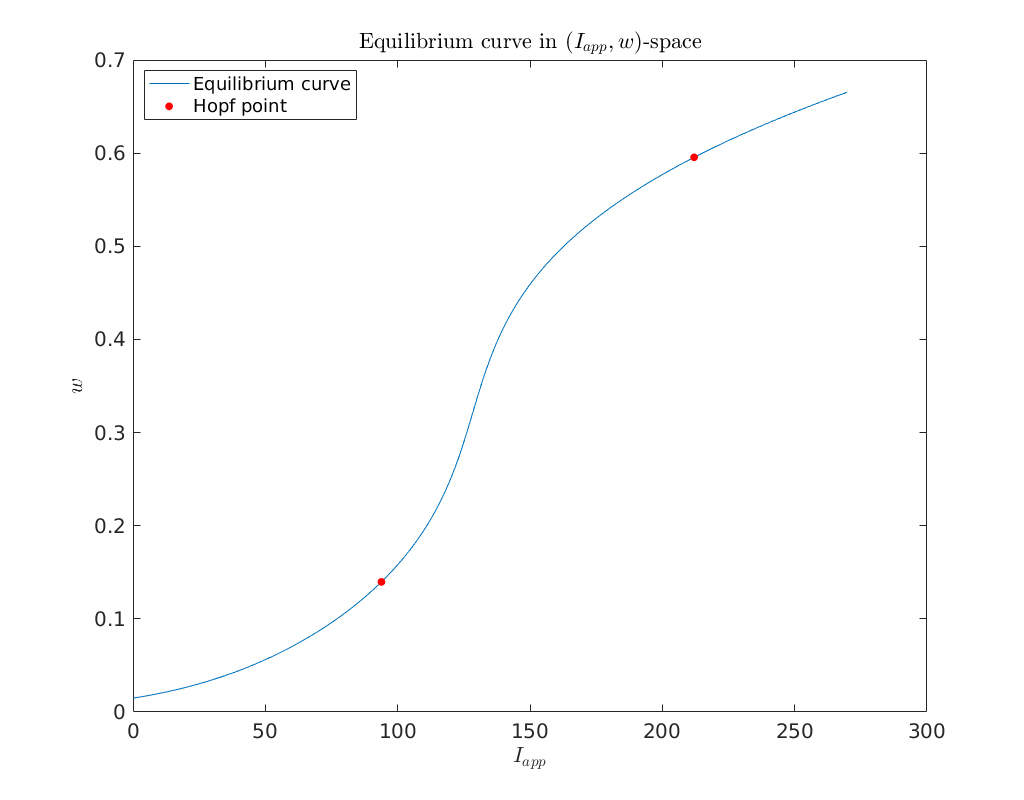

In [5]:
%plot --width 1024 --height 800
hopfPointsInfo   = eqbr_bif_data(strcmp({eqbr_bif_data.msg}, 'Hopf')==1);
HopfPoint1 = eqbr_x(:,hopfPointsInfo(1).index);
HopfPoint2 = eqbr_x(:,hopfPointsInfo(2).index);
plot(eqbr_x(3,:), eqbr_x(2,:)); hold on
plot(HopfPoint1(3), HopfPoint1(2), '.r' ,'MarkerSize', 20)
plot(HopfPoint2(3), HopfPoint2(2), '.r' ,'MarkerSize', 20)
xlabel('$I_{app}$')
ylabel('$w$')
legend({'Equilibrium curve', 'Hopf point'}, 'Location', 'NorthWest')
title('Equilibrium curve in $(I_{app},w)$-space')

## Setup Hopf point

To continue the first Hopf point in the parameters $I_{app}$ and $v_3$ we
construct a new point `hopf1` containing the position and parameter values.
These are needed to obtain an initial tangent vector - using the function
`init_H_H` - in the full phase/parameter space. Since, from now on, we will be
using the continuation parameters $I_{app}$ and $v_3$ frequently we assigned
these parameters to the variable `ap` (active parameters).

In [6]:
ap = [ind.Iapp ind.v3]; % continuation parameters
hopf1.par = p;
hopf1.par(ap) = eqbr_x(3, hopfPointsInfo(1).index);
hopf1.x = eqbr_x(1:2, hopfPointsInfo(1).index);
[x1, v1] = init_H_H(odefile, hopf1.x, hopf1.par', ap);

## Continue Hopf point in parameters $I_{app}$ and $v_3$

We continue the Hopf point curve using again the function `cont`. We use the
same continuation options as before defined above in the __struct__ `opt`, but
set additionally the following options. We increase the number of maximum
allowed continuation points. We also increase the accuracy for locating
detected bifurcations (`TestTolerance`) and the maximum number of iterations
that may be used to achieve this (`MaxTestIters`). This improves the homoclinic
predictor which depend directly on the accuracy of the located Bogdanov-Takens
point.

In [7]:
opt.TestTolerance = 1e-15;
opt.MaxTestIters = 10;
opt.MaxNumPoints = 2000;
[hopf_br, ~, hopf_br_bif] = cont(@hopf, x1, v1, opt);

first point found
tangent vector to first point found
label = BT, x = ( 13.611147 0.023136 -227.131888 69.755737 0.000000 )
(a,b)=(-1.119908e-03, -3.301195e-02)
label = BT, x = ( 2.815616 0.974408 487.997703 -51.777429 0.000000 )
(a,b)=(-7.485863e-04, -2.961373e-02)
label = BT, x = ( -11.152829 0.970208 519.625365 -63.401902 0.000000 )
(a,b)=(7.383698e-04, 2.289394e-02)
label = BT, x = ( -27.149904 0.037007 48.225939 21.734143 0.000000 )
(a,b)=(2.766145e-04, 1.513072e-02)
Closed curve detected at step 1866

elapsed time  = 2.3 secs
npoints curve = 1866


There are four Bogdanov-Takens bifurcation points (BT) detected on the Hopf
branch `hopf_br`. 

As with the Hopf points, information about the detected bifurcation points is
stored in the __struct array__ `hopf_br_bif`. Below we extract the
Bogdanov-Takens bifurcation points.

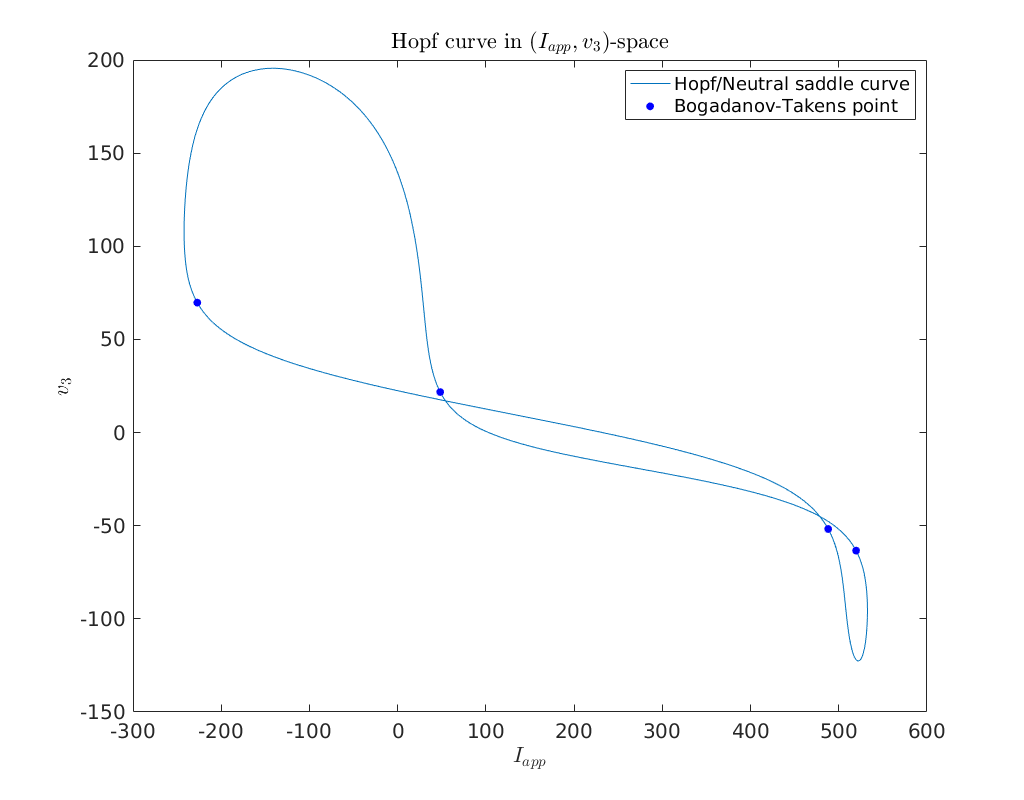

In [8]:
bt_points_info = hopf_br_bif(strcmp({hopf_br_bif.label}, 'BT')==1);
BTPoint1 = hopf_br(:,bt_points_info(1).index);
BTPoint2 = hopf_br(:,bt_points_info(2).index);
BTPoint3 = hopf_br(:,bt_points_info(3).index);
BTPoint4 = hopf_br(:,bt_points_info(4).index);
plot(hopf_br(3,:), hopf_br(4,:)); hold on
plot(BTPoint1(3), BTPoint1(4), '.b' ,'MarkerSize', 20)
plot(BTPoint2(3), BTPoint2(4), '.b' ,'MarkerSize', 20)
plot(BTPoint3(3), BTPoint3(4), '.b' ,'MarkerSize', 20)
plot(BTPoint4(3), BTPoint4(4), '.b' ,'MarkerSize', 20)
xlabel('$I_{app}$')
ylabel('$v_3$')
legend({'Hopf/Neutral saddle curve', 'Bogadanov-Takens point'}, 'Location', 'NorthEast')
title('Hopf curve in $(I_{app},v_3)$-space')

(initial-prediction-Homoclinic-orbit)=
## Initial prediction of homoclinic orbit near Bogdanov-Takens point 1

To obtain an initial approximation to the homoclinic solution near the
Bogdanov-Takens point we use the function `init_BT_Hom`. Its arguments are the
system file (`odefile`), the Bogdanov-Takens point (`bt1`) as defined below, the
unfolding parameters (`ap`) and an options structure (`BToptions`). The options
structure created with the function `BT_Hom_set_options` contains the following
fields:

- `ntst` Number of mesh intervals with a default value of 40.
- `ncol` Number of collocation points used in each interval with a default of 4.
- `extravec` Three dimensional boolean row vector indicating which _homoclinic
  parameters_ are selected to be free. The first component refers to the
  half-return time, while the second and third components refer to the
  distances from the saddle point to the first, respectively, the last point on
  the homoclinic orbit. The default value is set to `[0 1 1]`. Thus, the
  half-return time `T` is fixed.
- `order` The order of the homoclinic approximation used with a default value
  of 3.
- `amplitude` Desired amplitude of the homoclinic solution. If left empty then
  a conservative estimate is made, see {cite}`Bosschaert@2021`.
- `TTolerance` Desired distance between the last point on the numerical
  homoclinic solution and the saddle point. This should be at least be smaller
  than the amplitude. If left empty it is defined by `amplitude*1.0e-03`.
- `HigherOrderTimeReparametrization` Boolean to indicate if a higher order
  approximation to the nonlinear time transformation in the Lindstedt-Poincaré
  method should be used. This should always be set to `1`.  It is only
  implemented for demonstration purposes.
- `method` Selects the method to be used to approximate the homoclinic
  solution. The different methods available are:
  - orbital (the default),
  - orbitalv2,
  - LP (Lindstedt-Poincaré with smooth normal form),
  - LPHypernormalForm,
  - RegularPerturbation,
  - RegularPerturbationL2.
  
  We refer to {cite}`Bosschaert@2021` for the interpretations.
- `messages` Boolean to indicate if information about selected parameter should
  be printed the console. The default value is set to `true`.
- `correct` Boolean to indicate if the predicted homoclinic solution should be
  corrected with Newton. The default value is set to `true`.

Here we will use the default values for the Bogdanov-Takens option structure,
except we set the field `correct` to `false` and manually correct the
approximation.

In [9]:
bt_index = bt_points_info(1).index;
bt1.x = hopf_br(1:2, bt_index);
bt1.par = p';
bt1.par(ap) = hopf_br(3:4, bt_index);
BToptions = BT_Hom_set_options();
BToptions.correct = false;
[x1_pred, v1_pred] = init_BT_Hom(odefile, bt1, ap, BToptions);

Center manifold coefficients' accuracy: 2.842171e-14
BT normal form coefficients:
a=-1.119908e-03,	 b=-3.301195e-02
The initial perturbation parameter epsilon:  1.000000e-01
The initial amplitude: 0.0616583
The initial half-return time T: 1221.71
The initial distance eps0: 3.339e-05
The initial distance eps1: 0.000109


## Correct initial prediction of homoclinic orbit near bt1 with Newton

Now that we have an initial prediction for the homoclinic orbit we 
manually correct it using Newton. After the homoclinic predictor is corrected
with the __MatCont__ function `newtcorr` we use the function `bt_rearr`
(Bogdanov-Takens rearrange) to extract the homoclinic orbit and saddle point
from the homoclinic correction.

In [10]:
[hom1_x, hom1_v, ~] = newtcorr(x1_pred, v1_pred);
[x1_orbit, x1_saddle] = bt_rearr(hom1_x);

## Compare profiles of predicted and corrected solution (bt1)

Using again the __MatCont__ function `bt_rearr`, but now on the homoclinic
prediction `x1_pred` we compare the profiles of the predicted and corrected
homoclinic orbits. We see that they are indistinguishable. Note that to access
the mesh on which the homoclinic orbit is computed we need the global variable
`homds`.

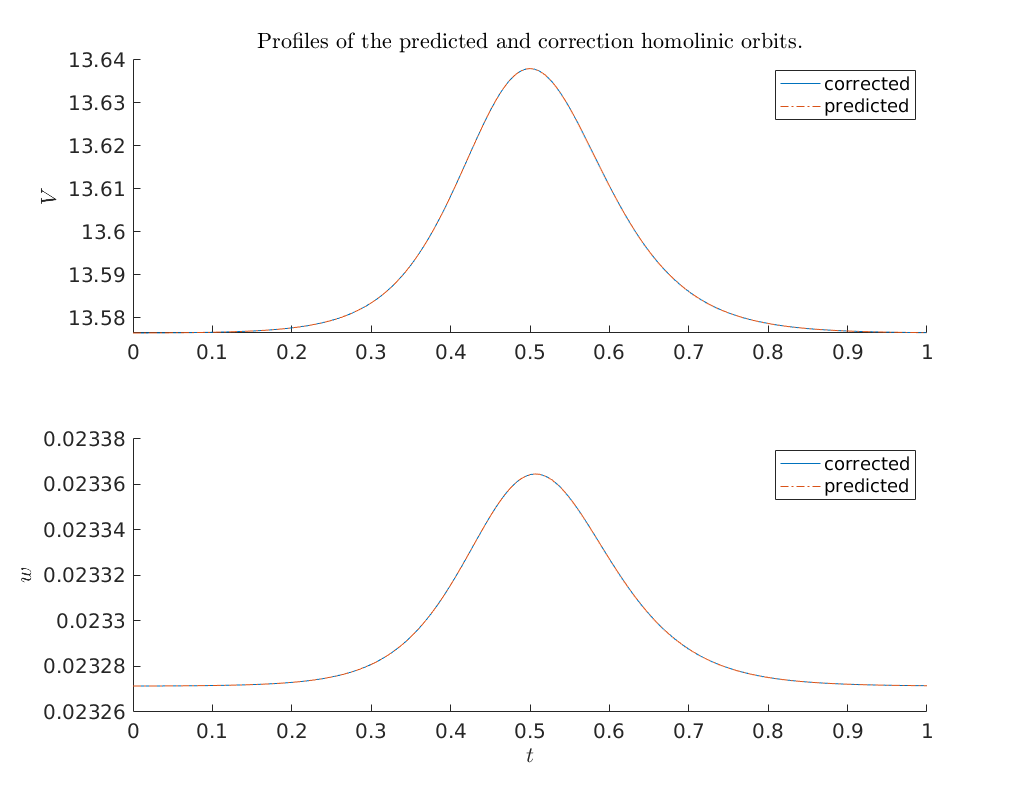

In [11]:
[homoclinic1_pred, saddle1_pred] = bt_rearr(x1_pred);
subplot(2,1,1); hold on;
global homds
title('Profiles of the predicted and correction homolinic orbits.')
plot(homds.finemsh, x1_orbit(1:2:end))
plot(homds.finemsh, homoclinic1_pred(1:2:end),'-.')
legend({'corrected', 'predicted'})
ylabel('$V$')
subplot(2,1,2); hold on;
plot(homds.finemsh, x1_orbit(2:2:end))
plot(homds.finemsh, homoclinic1_pred(2:2:end),'-.')
legend({'corrected','predicted'})
ylabel('$w$')
legend({'corrected',  'predicted'})
xlabel('$t$')

## Compare predictor and corrected solution in $(V, w)$ phase-space

Below we compare the predicted and corrected homoclinic orbit in $(V, w)$
phase-space, as well as the predicted and corrected saddle point. 

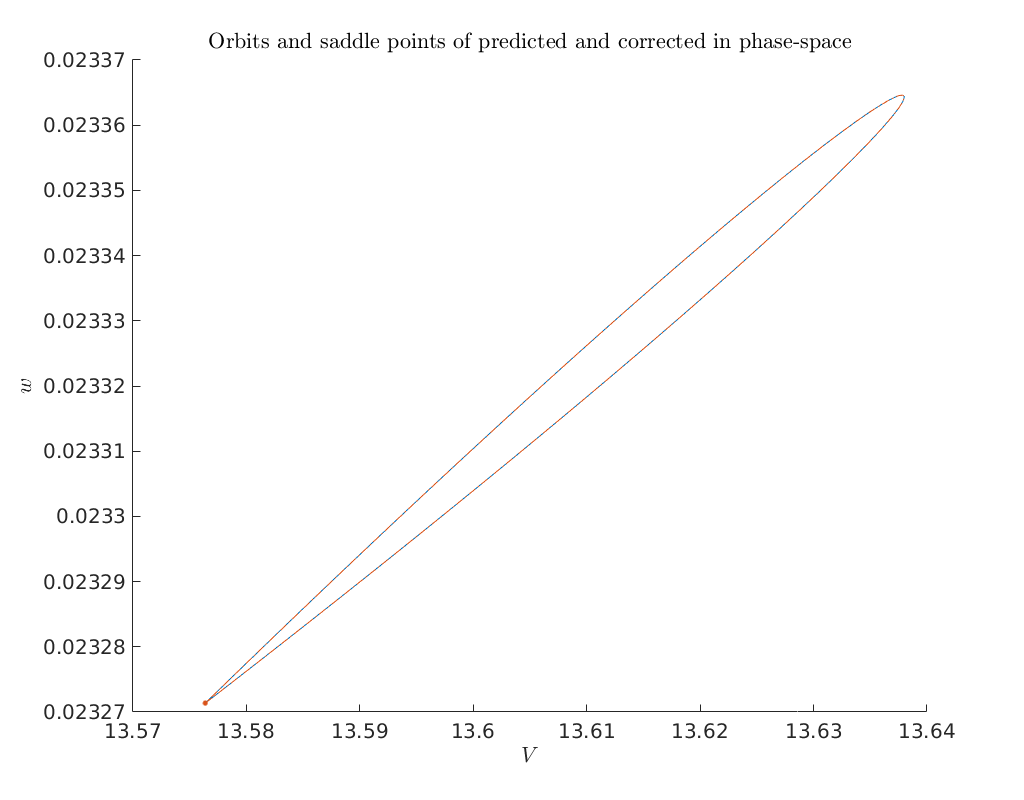

In [12]:
hold on
plot(x1_orbit(1:2:end),x1_orbit(2:2:end))
plot(homoclinic1_pred(1:2:end),homoclinic1_pred(2:2:end),'-.')
plot(x1_saddle(1), x1_saddle(2),'.', 'MarkerSize', 12, 'Color', [0 0.4470 0.7410])
plot(saddle1_pred(1), saddle1_pred(2),'.', 'MarkerSize', 12, 'Color', [0.8500, 0.3250, 0.0980])
xlabel('$V$')
ylabel('$w$')
title('Orbits and saddle points of predicted and corrected in phase-space')

## Continue homoclinic curve emanating from bt1

Having obtain an initial approximation `[hom_x, hom_v]`, where `homo_v` is the
tangent vector to the homoclinic curve pointing outwards from the
Bogdanov-Takens point, we can start continuation using the function `cont`.
Since, we are not interested in bifurcations of the homoclinic
orbit, we disable the detection of homoclinic bifurcations `opt.Singularities =
0`. This will reduce the computational cost. We also set the maximum number of
continuation steps. 

In [13]:
opt.Singularities = 0;
opt.MaxNumPoints = 1000;
homoclinic_br1 = cont(@homoclinic, hom1_x, hom1_v, opt);

first point found
tangent vector to first point found
Current step size too small (point 477)
elapsed time  = 18.7 secs
npoints curve = 477


## Compare predicted with computed parameters emanating from bt1

Now that we have obtained a curve of homoclinic orbits (`homoclinic_br`) we
compare the computed curve in parameter space with the predicted curve we
construct below. To do so, we use the function `BT_nmfm_orbital` to obtain the
smooth orbital normal form coefficients, i.e. $a$ and $b$, and the coefficients
of the transformation $K$ between the parameters of the system and the parameters
in the smooth orbital normal form, see {cite}`Bosschaert@2021`.

Center manifold coefficients' accuracy: 2.842171e-14


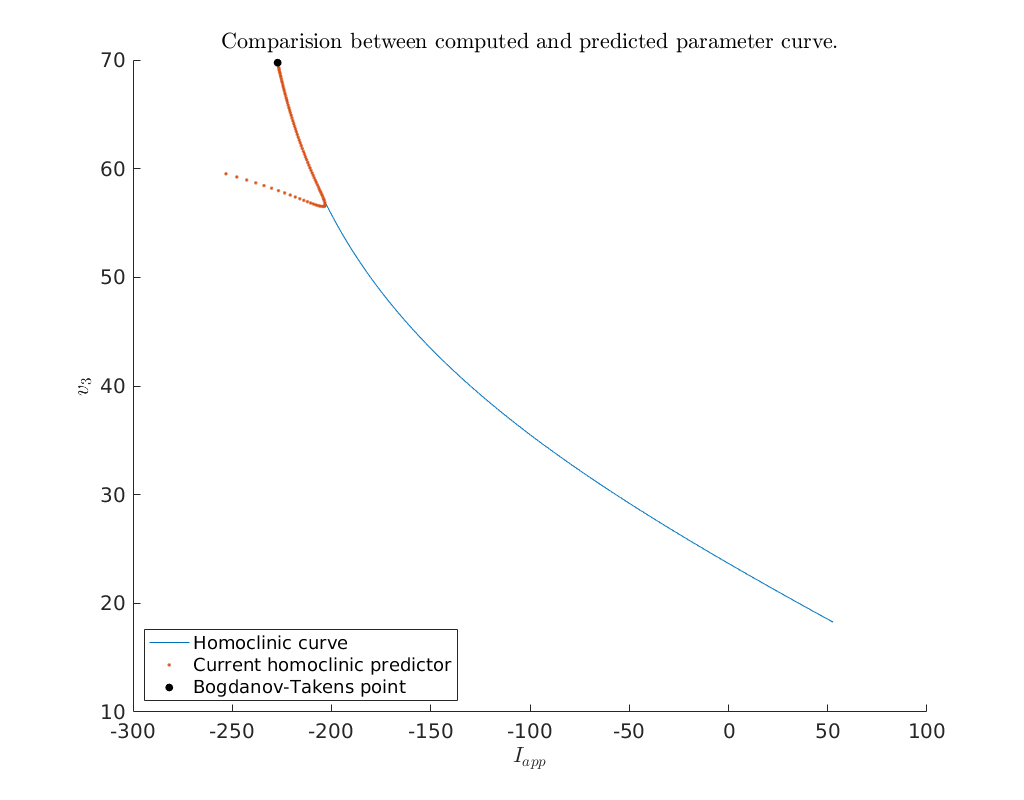

In [14]:
hold on
% plot computed homoclinic parameter curve
plot(homoclinic_br1(homds.PeriodIdx+1,:), ...
     homoclinic_br1(homds.PeriodIdx+2,:));
% Bogdanov-Takens parameter-dependent smooth orbital normal form coefficients
bt1 = BT_nmfm_orbital(odefile, bt1, ap, BToptions);
a   = bt1.nmfm.a;
b   = bt1.nmfm.b;
K10 = bt1.nmfm.K10;
K01 = bt1.nmfm.K01;
K02 = bt1.nmfm.K02;
K11 = bt1.nmfm.K11;
K03 = bt1.nmfm.K03;
% construct predictor as in the paper
eps = linspace(0, 1.8);
beta1 = -4*a^3/b^4*eps.^4;
tau0  = 10/7;
tau2  = 288/2401;
beta2 = a/b*(tau0 + tau2*eps.^2).*eps.^2;
alpha = K10.*beta1 + K01.*beta2 + 1/2*K02.*beta2.^2 ...
    + K11.*beta1.*beta2 + 1/6*K03.*beta2.^3;
alpha = bt1.par(ap) + alpha;
% plot currect predictor
plot(alpha(1,:), alpha(2,:), '.')
% plot Bogdanov-Takens point
plot(bt1.par(ind.Iapp), bt1.par(ind.v3), '.k', 'MarkerSize', 20)
% set axis labels and legend
xlabel('$I_{app}$')
ylabel('$v_3$')
legend({'Homoclinic curve', 'Current homoclinic predictor', ...
    'Bogdanov-Takens point'}, 'Location', 'SouthWest')
title('Comparision between computed and predicted parameter curve.')

## Bifurcation diagram in $(V,w)$ phase-space

To obtain an impression of the  homoclinic solutions we plot the computed
homoclinic orbits in $(V,w)$ phase-space.

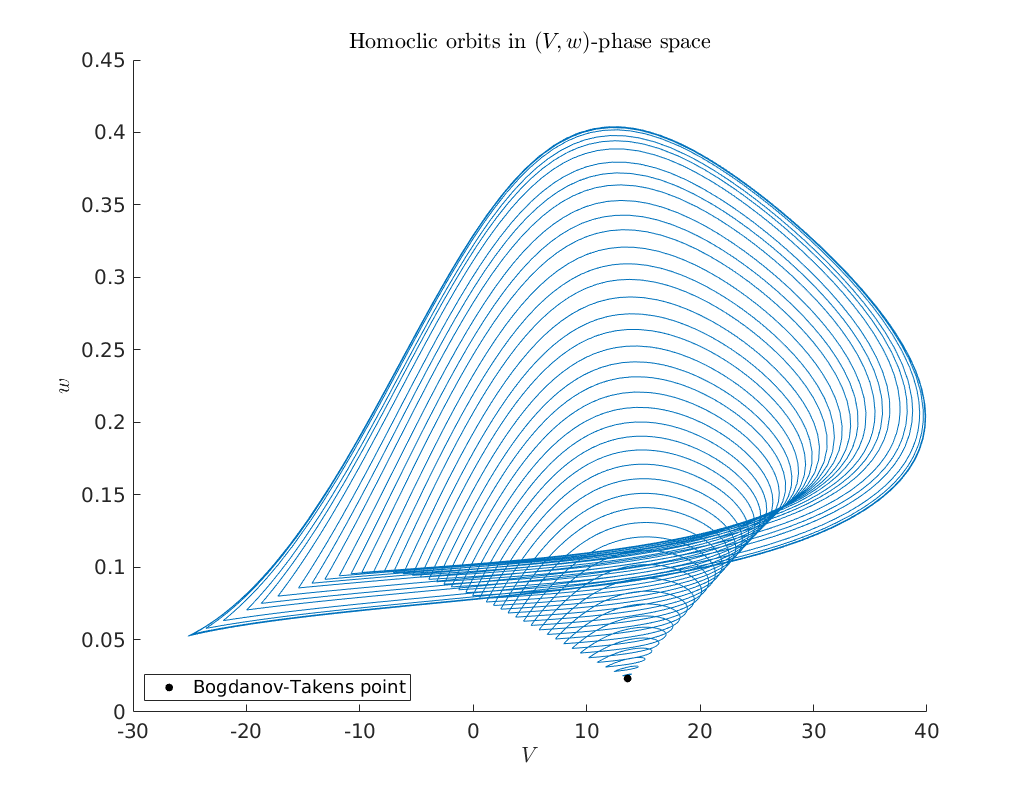

In [15]:
hold on
plot(homoclinic_br1(homds.coords(1:homds.nphase:end), 1:10:end), ...
     homoclinic_br1(homds.coords(2:homds.nphase:end), 1:10:end), ...
     'Color', [0 0.4470 0.7410], 'HandleVisibility', 'Off')
xlabel('$V$')
ylabel('$w$')
plot(bt1.x(1), bt1.x(2), '.k' ,'MarkerSize', 20)
legend('Bogdanov-Takens point', 'Location', 'SouthWest')
title('Homoclic orbits in $(V,w)$-phase space')

### Predictors of orbits for various epsilons

Before proceeding with continuing the homoclinic orbits emanating from the
remaining three Bogdanov-Takens points we show that the estimate of the
amplitude is very conservative. Below we compute for a large range of
amplitudes the predicted and corrected homoclinic solutions and compare them in
phase space. We see that for this model even with an amplitude of `2` the
predicted homoclinic orbit is still very close.

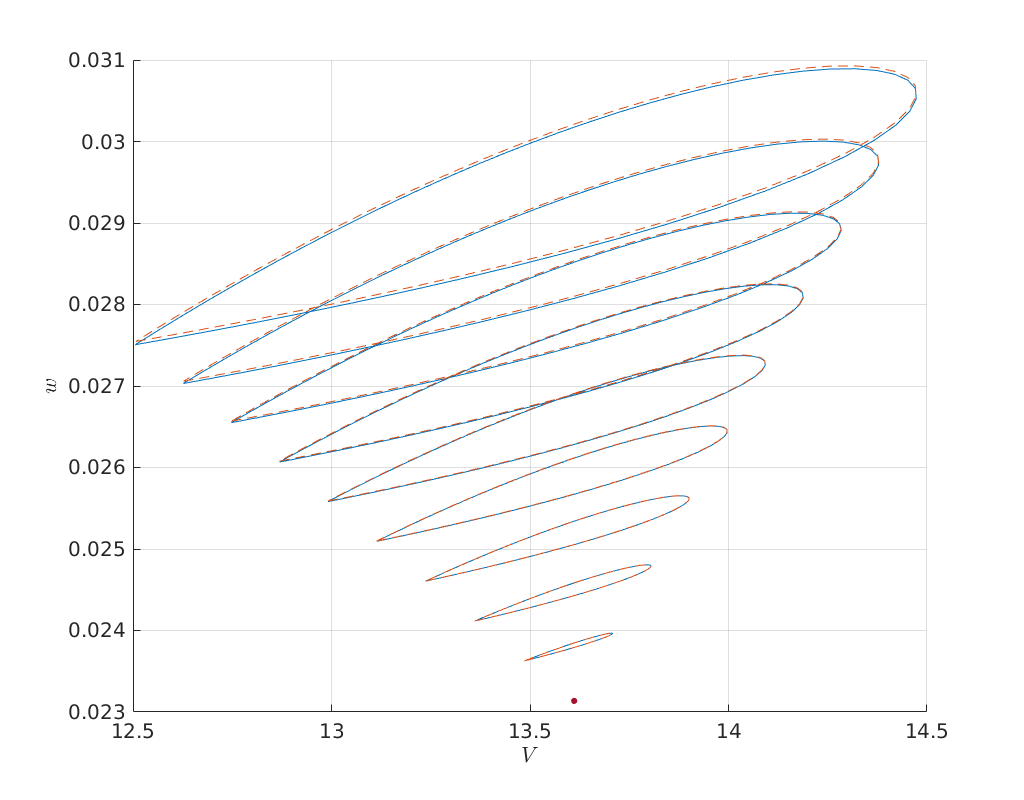

In [16]:
options = BT_Hom_set_options();
options.messages = false;
options.correct = false;
options.TTolerance = 1.0e-05;

amplitudes = linspace(1.0e-03, 2,10);
XPredicted = zeros(330,length(amplitudes));
XCorrected = zeros(330,length(amplitudes));
for j=1:length(amplitudes)
  options.amplitude = amplitudes(j);
  [x_pred, v0] = init_BT_Hom(odefile, bt1, ap, options);
  XPredicted(:,j) = x_pred;
  try
    XCorrected(:,j) = newtcorr(x_pred, v0);
  catch
    warning('Didn''t convergence to homoclinic solution')
  end
end

hold on
cm = lines;
plot(XPredicted(homds.coords(1:homds.nphase:end),1:10), ...
     XPredicted(homds.coords(2:homds.nphase:end),1:10), ...
      'color', cm(1,:))
plot(XCorrected(homds.coords(1:homds.nphase:end),1:10), ...
     XCorrected(homds.coords(2:homds.nphase:end),1:10), ...
      '--', 'color', cm(2,:))
plot(bt1.x(1), bt1.x(2), '.', 'MarkerSize', 16)
xlabel('$V$')
ylabel('$w$')
grid on

## Continue homoclinic orbits from the remaining Bogdanov-Takens bifurcation points

The code below continues and plots the homoclinic orbits emanating for each of the
remaining three detected Bogdanov-Takens points.

In [17]:
bt_index = bt_points_info(2).index;
bt2.x = hopf_br(1:2, bt_index);
bt2.par = p';
bt2.par(ap) = hopf_br(3:4, bt_index);
opt.MaxNumPoints = 100;
BToptions.correct = true;
[hom2_pred, hom2_v_pred] = init_BT_Hom(odefile, bt2, ap, BToptions);
homoclinic_br2 = cont(@homoclinic, hom2_pred, hom2_v_pred, opt);

Center manifold coefficients' accuracy: 3.552714e-15
BT normal form coefficients:
a=-7.485863e-04,	 b=-2.961373e-02
The initial perturbation parameter epsilon:  1.000000e-01
The initial amplitude: 0.0512162
The initial half-return time T: 1637.03
The initial distance eps0: 2.85469e-05
The initial distance eps1: 9.2748e-05
first point found
tangent vector to first point found

elapsed time  = 3.6 secs
npoints curve = 100


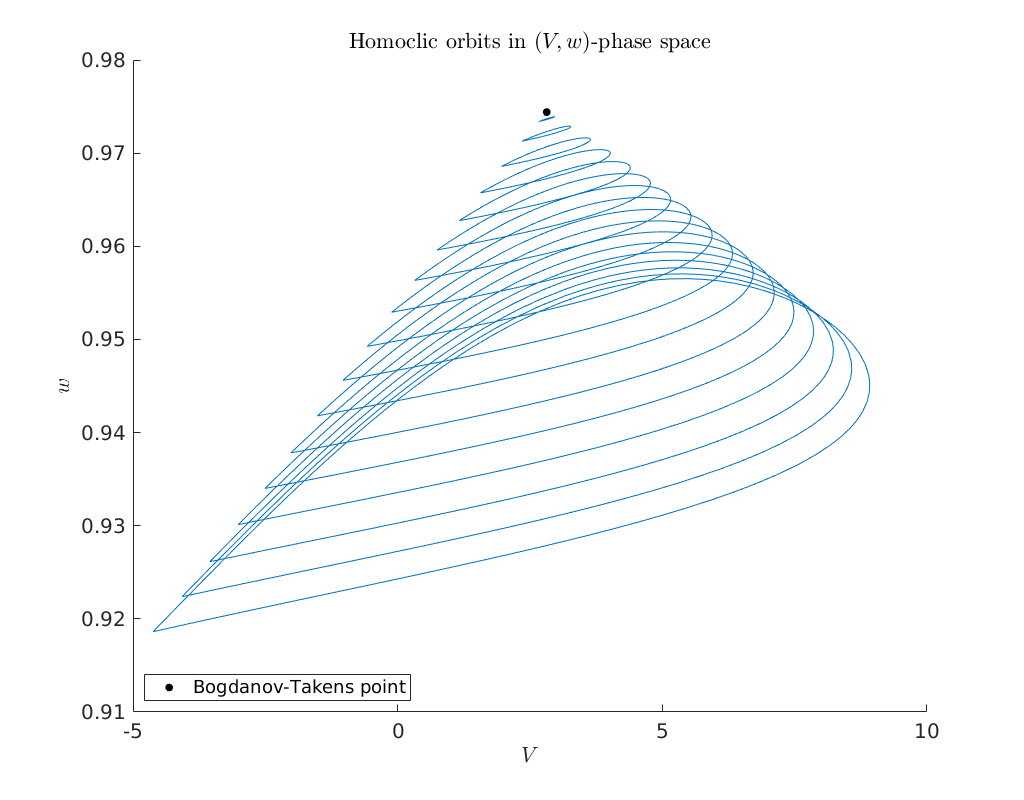

In [18]:
hold on
plot(homoclinic_br2(homds.coords(1:homds.nphase:end), 1:5:end), ...
    homoclinic_br2(homds.coords(2:homds.nphase:end), 1:5:end), ...
     'Color', [0 0.4470 0.7410], 'HandleVisibility', 'Off')
xlabel('$V$')
ylabel('$w$')
plot(bt2.x(1), bt2.x(2), '.k' ,'MarkerSize', 20)
legend('Bogdanov-Takens point', 'Location', 'SouthWest')
title('Homoclic orbits in $(V,w)$-phase space')

In [19]:
bt_index = bt_points_info(3).index;
bt3.x = hopf_br(1:2, bt_index);
bt3.par = p';
bt3.par(ap) = hopf_br(3:4, bt_index);
[hom3_pred, hom3_v_pred] = init_BT_Hom(odefile, bt3, ap, BToptions);
opt.MaxNumPoints  = 200;
homoclinic_br3 = cont(@homoclinic, hom3_pred, hom3_v_pred, opt);

Center manifold coefficients' accuracy: 1.136868e-13
BT normal form coefficients:
a=7.383698e-04,	 b=2.289394e-02
The initial perturbation parameter epsilon:  1.000000e-01
The initial amplitude: 0.0845248
The initial half-return time T: 1284.91
The initial distance eps0: 4.5998e-05
The initial distance eps1: 0.000150094
first point found
tangent vector to first point found
Current step size too small (point 141)
elapsed time  = 5.9 secs
npoints curve = 141


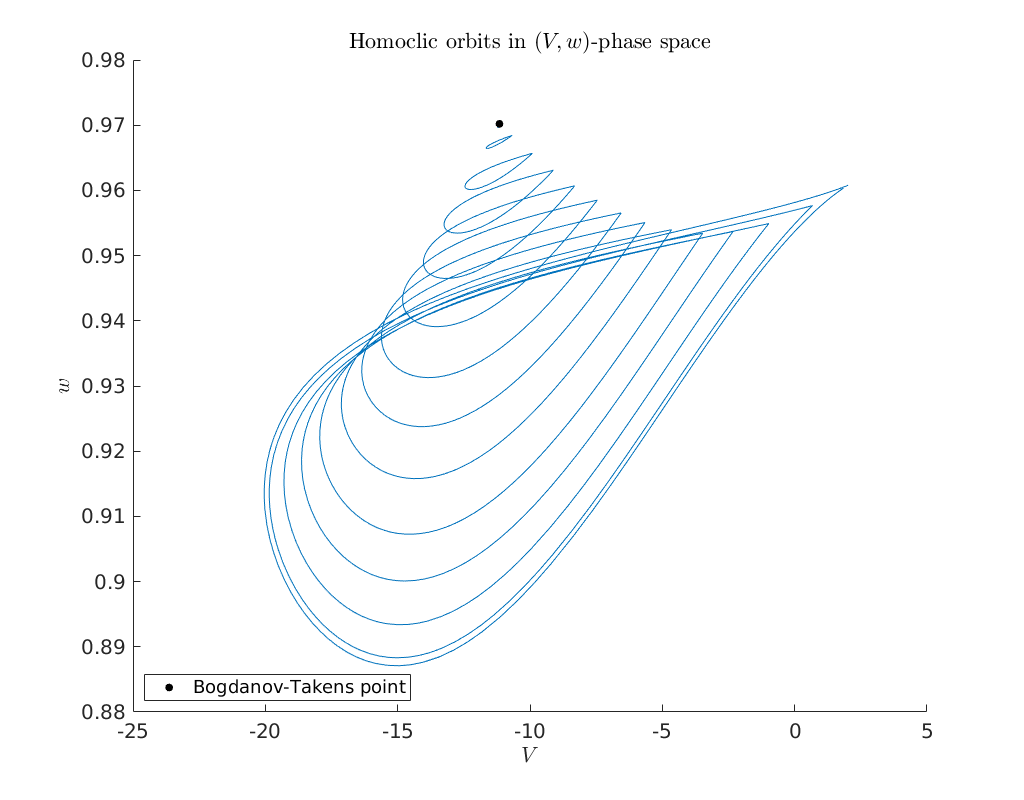

In [20]:
hold on
plot(homoclinic_br3(homds.coords(1:homds.nphase:end), 1:10:end), ...
     homoclinic_br3(homds.coords(2:homds.nphase:end), 1:10:end), ...
     'Color', [0 0.4470 0.7410], 'HandleVisibility', 'Off')
xlabel('$V$')
ylabel('$w$')
plot(bt3.x(1), bt3.x(2), '.k' ,'MarkerSize', 20)
legend('Bogdanov-Takens point', 'Location', 'SouthWest')
title('Homoclic orbits in $(V,w)$-phase space')

In [21]:
bt_index = bt_points_info(4).index;
bt4.x = hopf_br(1:2, bt_index);
bt4.par = p';
bt4.par(ap) = hopf_br(3:4, bt_index);
[hom4_pred, hom4_v_pred] = init_BT_Hom(odefile, bt4, ap, BToptions);
homoclinic_br4 = cont(@homoclinic, hom4_pred, hom4_v_pred, opt);

Center manifold coefficients' accuracy: 1.136868e-13
BT normal form coefficients:
a=2.766145e-04,	 b=1.513072e-02
The initial perturbation parameter epsilon:  1.000000e-01
The initial amplitude: 0.0724949
The initial half-return time T: 2264.92
The initial distance eps0: 3.99117e-05
The initial distance eps1: 0.000129927
first point found
tangent vector to first point found

elapsed time  = 6.4 secs
npoints curve = 200


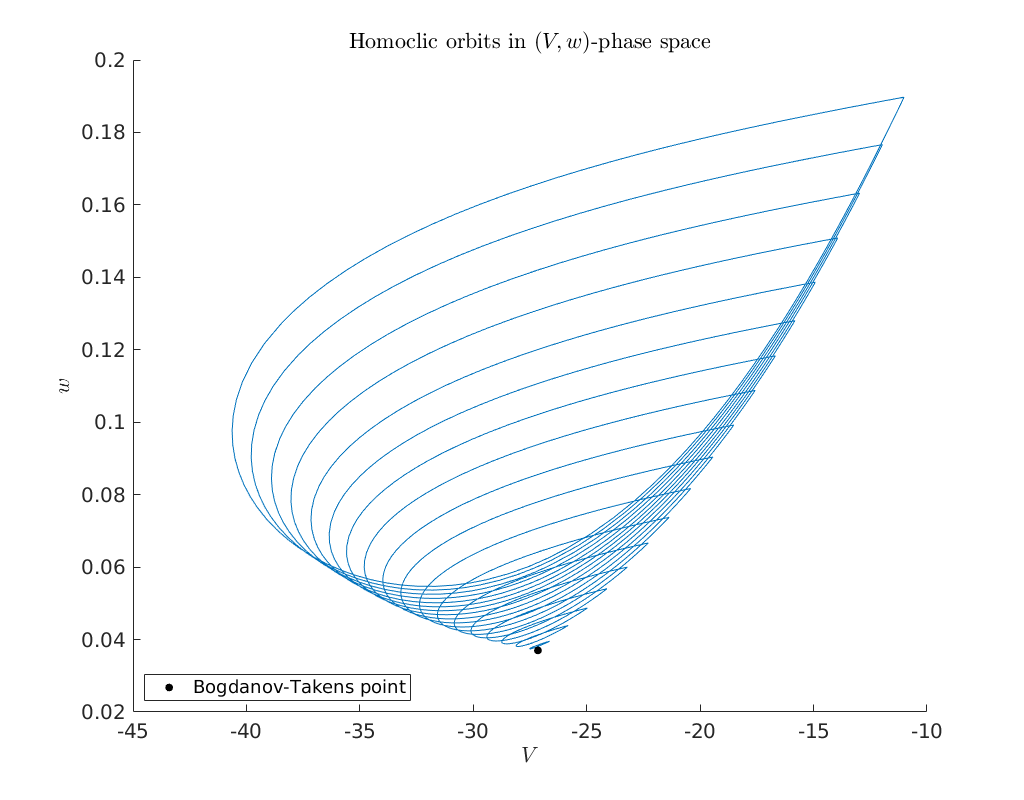

In [22]:
hold on
plot(homoclinic_br4(homds.coords(1:homds.nphase:end), 1:10:end), ...
     homoclinic_br4(homds.coords(2:homds.nphase:end), 1:10:end), ...
     'Color', [0 0.4470 0.7410], 'HandleVisibility', 'Off')
xlabel('$V$')
ylabel('$w$')
plot(bt4.x(1), bt4.x(2), '.k' ,'MarkerSize', 20)
legend('Bogdanov-Takens point', 'Location', 'SouthWest')
title('Homoclic orbits in $(V,w)$-phase space')

## Continue limit point from the first Bogdanov-Takens point

Next we also continue the limit points emanating from the first and third
Bogdanov-Takens points.

In [23]:
[lp1_x, lp1_v] = init_BT_LP(odefile, bt1.x, bt1.par, ap);
opt.MaxNumPoints = 2000;
opt.Singularities = 1;
opt.Backward = 1;
[lp1_br, ~, lp1_br_bif] = cont(@limitpoint, lp1_x, lp1_v, opt);
opt.Backward = 0;
opt.MaxNumPoints = 200;
lp1_br_rev = cont(@limitpoint, lp1_x, lp1_v, opt);

first point found
tangent vector to first point found
label = BT, x = ( 13.611147 0.023136 -227.131888 69.755737 )
(a,b)=(-1.119908e-03, -3.301195e-02)
label = CP, x = ( -10.103668 0.249467 92.105230 6.418208 )
c=5.229002e-05
label = BT, x = ( -27.149904 0.037007 48.225939 21.734143 )
(a,b)=(2.766145e-04, 1.513072e-02)

elapsed time  = 1.3 secs
npoints curve = 2000
first point found
tangent vector to first point found

elapsed time  = 0.2 secs
npoints curve = 200


In [24]:
[lp2_x, lp2_v] = init_BT_LP(odefile, bt3.x, bt3.par, ap);
opt.MaxNumPoints = 2000;
opt.Singularities = 1;
opt.Backward = 0;
[lp2_br, ~, lp2_br_bif] = cont(@limitpoint, lp2_x, lp2_v, opt);
opt.Backward = 1;
opt.MaxNumPoints = 200;
lp2_br_rev = cont(@limitpoint, lp2_x, lp2_v, opt);

first point found
tangent vector to first point found
label = BT, x = ( -11.152829 0.970208 519.625365 -63.401902 )
(a,b)=(7.383698e-04, 2.289394e-02)
label = CP, x = ( -2.672919 0.908521 457.907768 -37.108631 )
c=2.750363e-04
label = BT, x = ( 2.815616 0.974408 487.997703 -51.777429 )
(a,b)=(-7.485863e-04, -2.961373e-02)

elapsed time  = 1.1 secs
npoints curve = 2000
first point found
tangent vector to first point found

elapsed time  = 0.1 secs
npoints curve = 200


## Extract Cusp points

We see that during the continuation of the limit points two cusp (CP) points
were detected in addition to the four known Bogdanov-Takens bifurcation points.
We extract the cusp points in the code below.

In [25]:
cusp1_info = lp1_br_bif(strcmp({lp1_br_bif.label}, 'CP')==1);
cusp2_info = lp2_br_bif(strcmp({lp2_br_bif.label}, 'CP')==1);
Cusp1 = lp1_br(:,cusp1_info.index);
Cusp2 = lp2_br(:,cusp2_info.index);

## Plot all curves in $(V,w)$-phase-space 

Here we plot all continued curves and singularities in $(V,w)$-phase-space. To
get a detailed overview we split to plot into two parts.

### Upper part of the plot 

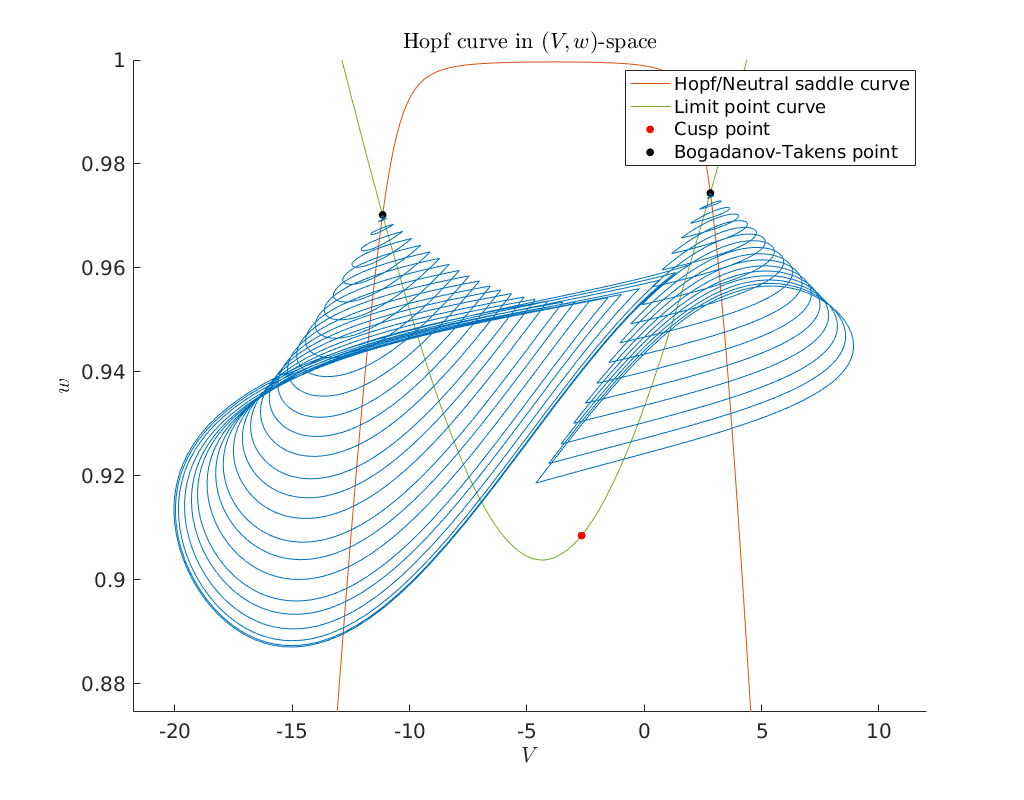

In [26]:
%plot --width 1024 --height 800
figure; hold on 
homColor  = cm(1,:);
hopfColor = cm(2,:);
foldColor = cm(5,:);
plot(hopf_br(1,:), hopf_br(2,:), 'Color', hopfColor); hold on
plot(lp2_br(1,:), lp2_br(2,:), 'Color', foldColor);
plot(lp2_br_rev(1,:), lp2_br_rev(2,:), 'Color', foldColor, ...
    'HandleVisibility', 'Off');
plot(Cusp2(1), Cusp2(2), '.r' ,'MarkerSize', 20)
plot(BTPoint2(1), BTPoint2(2), '.k' ,'MarkerSize', 20)
plot(BTPoint3(1), BTPoint3(2), '.k' ,'MarkerSize', 20)
plot(homoclinic_br2(homds.coords(1:homds.nphase:end), 1:5:end), ...
     homoclinic_br2(homds.coords(2:homds.nphase:end), 1:5:end), ...
     'Color', homColor, 'DisplayName', 'Off')
plot(homoclinic_br3(homds.coords(1:homds.nphase:end), 1:5:end), ...
     homoclinic_br3(homds.coords(2:homds.nphase:end), 1:5:end), ...
     'Color', homColor, 'HandleVisibility', 'Off')
xlabel('$V$')
ylabel('$w$')
legend({'Hopf/Neutral saddle curve', 'Limit point curve', 'Cusp point', ...
    'Bogadanov-Takens point'}, 'Location', 'NorthEast')
title('Hopf curve in $(V,w)$-space')
axis([-21.7891   12.0474    0.8746    1.0000])

### Lower part of the plot 

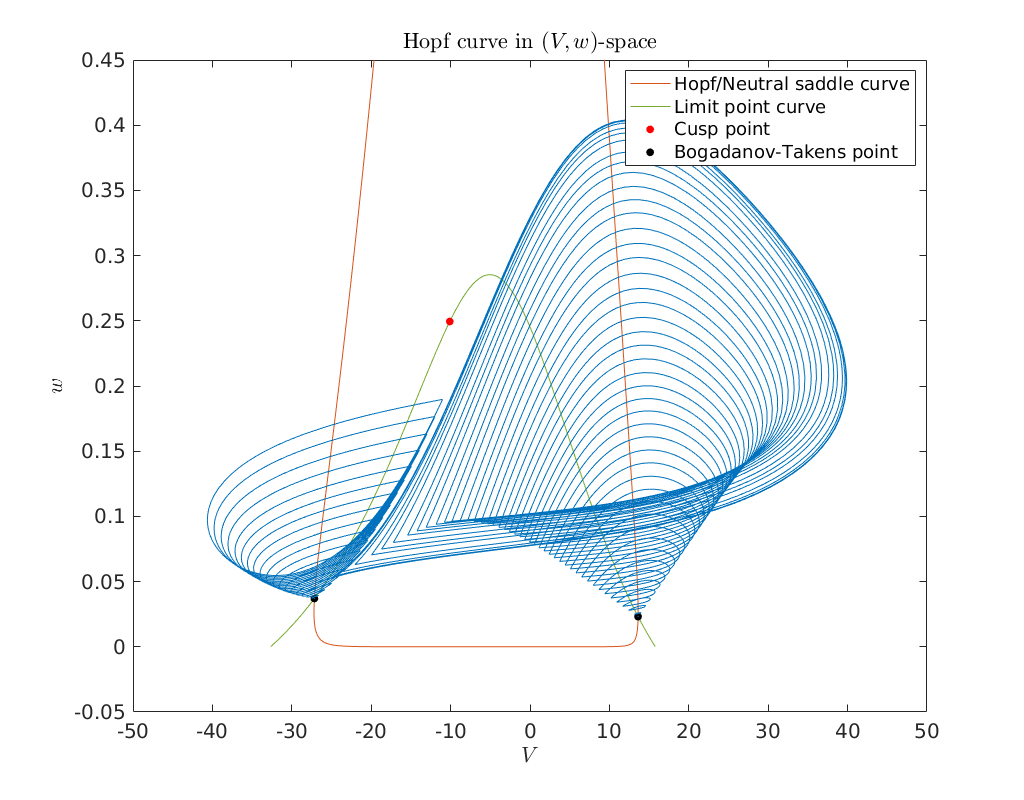

In [27]:
plot(hopf_br(1,:), hopf_br(2,:), 'Color', hopfColor); hold on
plot(lp1_br(1,:), lp1_br(2,:), 'Color', foldColor);
plot(lp1_br_rev(1,:), lp1_br_rev(2,:), 'Color', foldColor, ...
    'HandleVisibility', 'Off');
plot(Cusp1(1), Cusp1(2), '.r' ,'MarkerSize', 20)
plot(BTPoint1(1), BTPoint1(2), '.k' ,'MarkerSize', 20)
plot(BTPoint4(1), BTPoint4(2), '.k' ,'MarkerSize', 20)
plot(homoclinic_br1(homds.coords(1:homds.nphase:end), 1:10:end), ...
     homoclinic_br1(homds.coords(2:homds.nphase:end), 1:10:end), ...
     'Color', homColor, 'HandleVisibility', 'Off')
plot(homoclinic_br4(homds.coords(1:homds.nphase:end), 1:10:end), ...
     homoclinic_br4(homds.coords(2:homds.nphase:end), 1:10:end), ...
     'Color', homColor, 'HandleVisibility', 'Off')
xlabel('$V$')
ylabel('$w$')
legend({'Hopf/Neutral saddle curve', 'Limit point curve', 'Cusp point', ...
    'Bogadanov-Takens point'}, 'Location', 'NorthEast')
title('Hopf curve in $(V,w)$-space')
axis([-50 50 -0.05 0.45])

## Bifurcation plot

Here we plot all continued curves and singularities in $(I_{app},v_3)$
parameter space. As before, we split the plot into two parts to obtain a more
detailed overview.

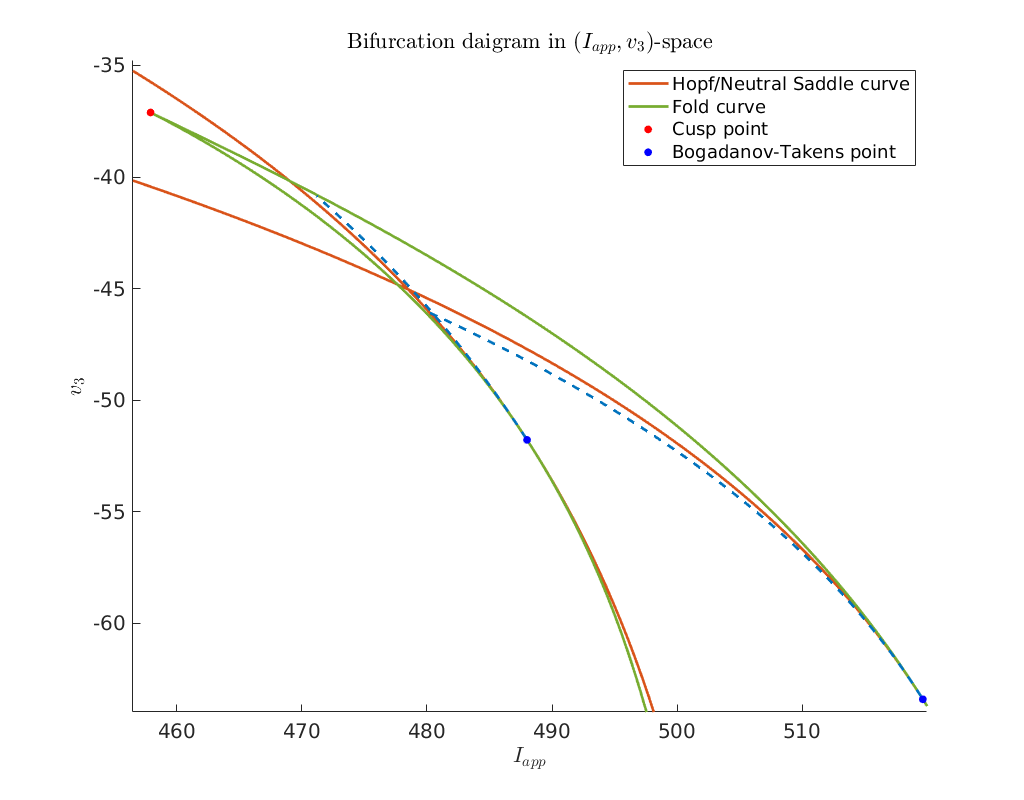

In [28]:
hold on
plot(hopf_br(3,:), hopf_br(4,:), 'Color', hopfColor, 'linewidth', 2)
plot(lp1_br(3,:), lp1_br(4,:), 'Color', foldColor, 'linewidth', 2)
plot(lp1_br_rev(3,:), lp1_br_rev(4,:), 'Color', foldColor, 'linewidth', 2, ...
    'HandleVisibility', 'Off')
plot(lp2_br(3,:), lp2_br(4,:), 'Color', foldColor, 'linewidth', 2, ...
    'HandleVisibility', 'Off')
plot(lp2_br_rev(3,:), lp2_br_rev(4,:), 'Color', foldColor, 'linewidth', 2, ...
    'HandleVisibility', 'Off')
plot(homoclinic_br1(homds.PeriodIdx+1,:), ...
     homoclinic_br1(homds.PeriodIdx+2,:), ...
     '--', 'Color', homColor, 'linewidth', 2, 'HandleVisibility', 'Off')
plot(homoclinic_br2(homds.PeriodIdx+1,:), ...
     homoclinic_br2(homds.PeriodIdx+2,:), ...
     '--', 'Color', homColor, 'linewidth', 2, 'HandleVisibility', 'Off')
plot(homoclinic_br3(homds.PeriodIdx+1,:), ...
     homoclinic_br3(homds.PeriodIdx+2,:), ...
     '--', 'Color', homColor, 'linewidth', 2, 'HandleVisibility', 'Off')
plot(homoclinic_br4(homds.PeriodIdx+1,:), ...
     homoclinic_br4(homds.PeriodIdx+2,:), ...
     '--', 'Color', homColor, 'linewidth', 2, 'HandleVisibility', 'Off')
plot(Cusp2(3), Cusp2(4), '.r' ,'MarkerSize', 20)
plot(BTPoint1(3), BTPoint1(4), '.b' ,'MarkerSize', 20)
plot(BTPoint2(3), BTPoint2(4), '.b' ,'MarkerSize', 20)
plot(BTPoint3(3), BTPoint3(4), '.b' ,'MarkerSize', 20)
plot(BTPoint4(3), BTPoint4(4), '.b' ,'MarkerSize', 20)
xlabel('$I_{app}$')
ylabel('$v_3$')
legend({'Hopf/Neutral Saddle curve', 'Fold curve', 'Cusp point',...
    'Bogadanov-Takens point'}, 'Location', 'NorthEast')
title('Bifurcation daigram in $(I_{app},v_3)$-space')
axis([456.5097  519.9544  -63.9705  -34.7564])

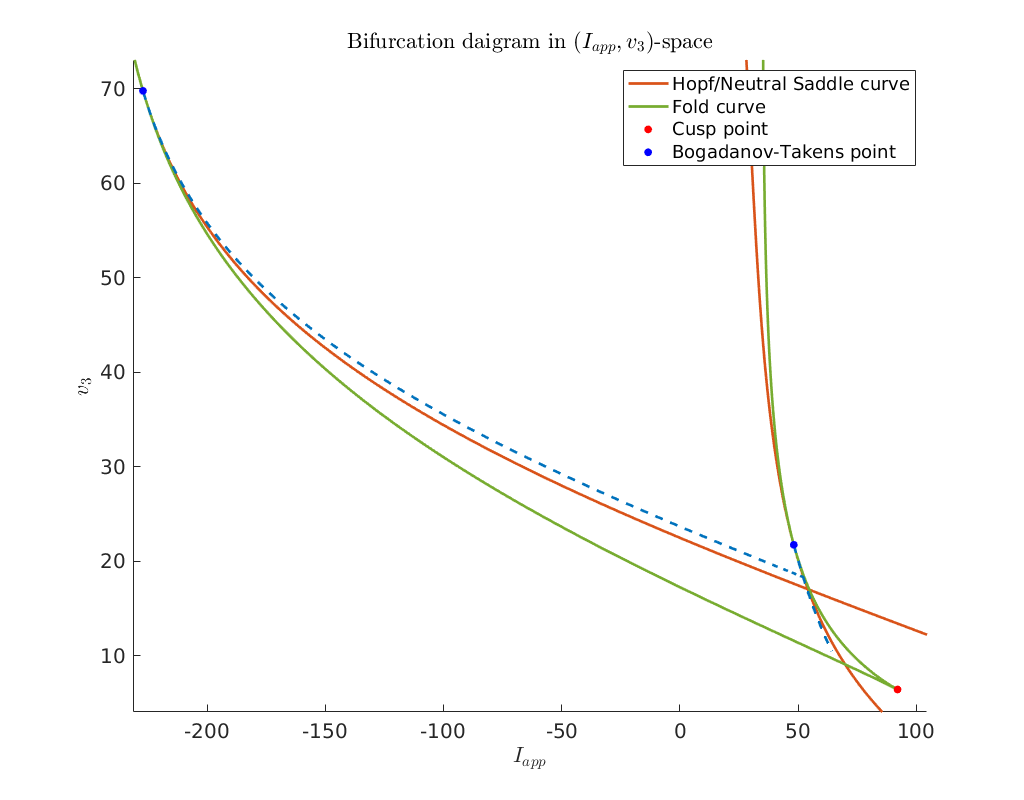

In [29]:
hold on
plot(hopf_br(3,:), hopf_br(4,:), 'Color', hopfColor, 'linewidth', 2)
plot(lp1_br(3,:), lp1_br(4,:), 'Color', foldColor, 'linewidth', 2)
plot(lp1_br_rev(3,:), lp1_br_rev(4,:), 'Color', foldColor, 'linewidth', 2, ...
    'HandleVisibility', 'Off')
plot(lp2_br(3,:), lp2_br(4,:), 'Color', foldColor, 'linewidth', 2, ...
    'HandleVisibility', 'Off')
plot(lp2_br_rev(3,:), lp2_br_rev(4,:), 'Color', foldColor, 'linewidth', 2, ...
    'HandleVisibility', 'Off')
plot(homoclinic_br1(homds.PeriodIdx+1,:), ...
     homoclinic_br1(homds.PeriodIdx+2,:), ...
     '--', 'Color', homColor, 'linewidth', 2, 'HandleVisibility', 'Off')
plot(homoclinic_br2(homds.PeriodIdx+1,:), ...
     homoclinic_br2(homds.PeriodIdx+2,:), ...
     '--', 'Color', homColor, 'linewidth', 2, 'HandleVisibility', 'Off')
plot(homoclinic_br3(homds.PeriodIdx+1,:), ...
     homoclinic_br3(homds.PeriodIdx+2,:), ...
     '--', 'Color', homColor, 'linewidth', 2, 'HandleVisibility', 'Off')
plot(homoclinic_br4(homds.PeriodIdx+1,:), ...
     homoclinic_br4(homds.PeriodIdx+2,:), ...
     '--', 'Color', homColor, 'linewidth', 2, 'HandleVisibility', 'Off')
plot(Cusp1(3), Cusp1(4), '.r' ,'MarkerSize', 20)
plot(BTPoint1(3), BTPoint1(4), '.b' ,'MarkerSize', 20)
plot(BTPoint2(3), BTPoint2(4), '.b' ,'MarkerSize', 20)
plot(BTPoint3(3), BTPoint3(4), '.b' ,'MarkerSize', 20)
plot(BTPoint4(3), BTPoint4(4), '.b' ,'MarkerSize', 20)
xlabel('$I_{app}$')
ylabel('$v_3$')
legend({'Hopf/Neutral Saddle curve', 'Fold curve', 'Cusp point',...
    'Bogadanov-Takens point'}, 'Location', 'NorthEast')
title('Bifurcation daigram in $(I_{app},v_3)$-space')
axis([-231.3697  104.5793    4.0404   73.0235])

## Convergence plot

We finish this notebook with a log-log convergence plot comparing the different
third order homoclinic approximation methods derived in {cite}`Bosschaert@2021`
to approximate the homoclinic solutions near the first Bogdanov-Takens point.
On the abscissa is the amplitude $A_0$ and on the ordinate the relative error
$\delta$ between the constructed solution (`x_pred`) to the defining system for the
homoclinic orbit and the Newton corrected solution (`x_corrected`).

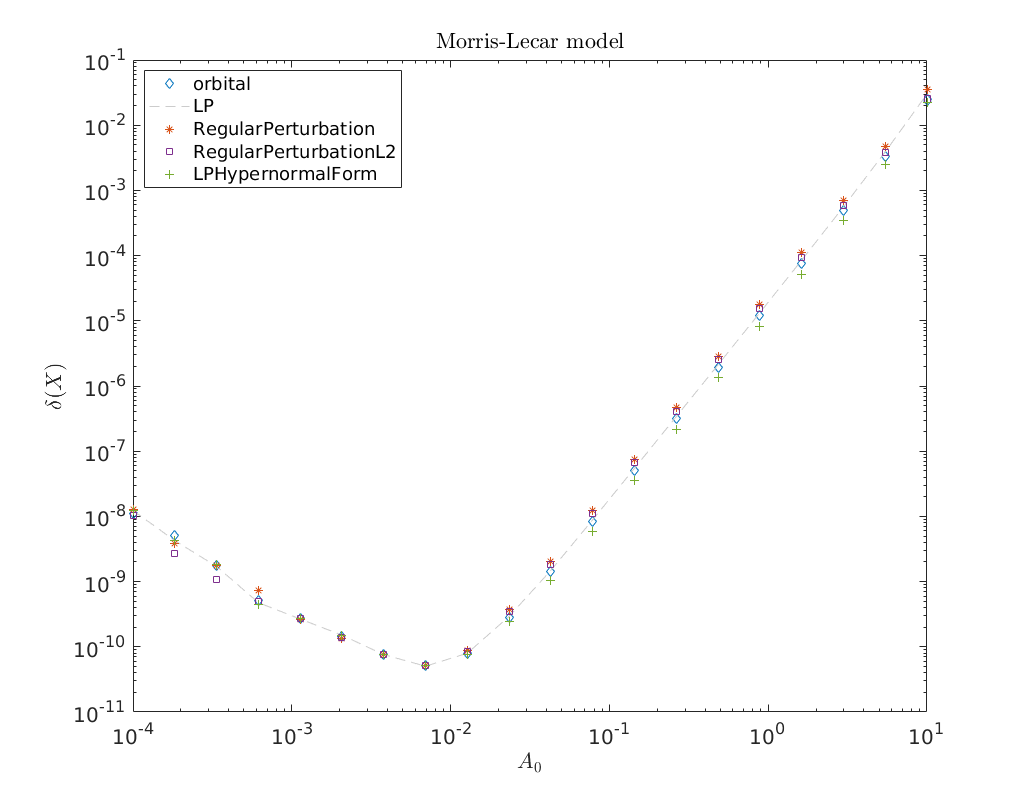

In [30]:
BToptions = BT_Hom_set_options();
BToptions.TTolerance = 1e-05;
BToptions.messages = false;
BToptions.correct = false;

amplitudes = logspace(-4, 1, 20);
methodList = {'orbital', 'LP', 'RegularPerturbation', ...
    'RegularPerturbationL2', 'LPHypernormalForm'};
relativeErrors = {};
for i=1:length(methodList)
    BToptions.method = methodList{i};
    relativeErrors{i} = zeros(size(amplitudes));
    for j=1:length(amplitudes)
    BToptions.amplitude = amplitudes(j);
    [x_pred, v0] = init_BT_Hom(odefile, bt1, ap, BToptions);
    try
        x_corrected = newtcorr(x_pred, v0);
        relativeErrors{i}(j) = norm(x_corrected-x_pred)/norm(x_corrected);
    catch
        warning('Did not converge.')
        continue
    end
  end
end

loglog(amplitudes, relativeErrors{1}(:), 'd', ...
       amplitudes, relativeErrors{2}(:), '--', ...
       amplitudes, relativeErrors{3}(:), '*', ...
       amplitudes, relativeErrors{4}(:), 's', ...
       amplitudes, relativeErrors{5}(:), '+')
legend(methodList, 'Location', 'NorthWest')
title('Morris-Lecar model')
xlabel('$A_0$')
ylabel('$\delta(X)$')
ax = gca;
ax.ColorOrder = [cm(1,:); [0.8 0.8 0.8]; cm(2,:); cm(4,:); cm(5,:)];